In [1]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import math as mt
import matplotlib.pyplot as plt

2.6.0


In [2]:
a1=45*np.sqrt(5)
a2=24*np.sqrt(806115)
a3=1560*np.sqrt(49407661)

a1=45*np.sqrt(5)

In [3]:
def basis_fct(k,t):
    if k==1:
        return 1+0*t
    if k==2:
        return -1+np.exp(-t)
    if k==3:
        return np.exp(-t)*t
    if k==4:
        return (1/2)*(-2*np.exp(-t)*t+np.exp(-t)*np.power(t,2))
    if k==5:
        return (-6*np.exp(-t)*t-36*np.exp(-t)*np.power(t,2)+np.exp(-t)*np.power(t,3))/a1
    if k==6:
        return (-24*np.exp(-t)*t-192*np.exp(-t)*np.power(t,2)-1440*np.exp(-t)*np.power(t,3)+np.exp(-t)*np.power(t,4))/a2
    if k==7:
        return (-120*np.exp(-t)*t-1200*np.exp(-t)*np.power(t,2)-10800*np.exp(-t)*np.power(t,3)+100800*np.exp(-t)*np.power(t,4)+np.exp(-t)*np.power(t,5))/a3
    else:
        return 0

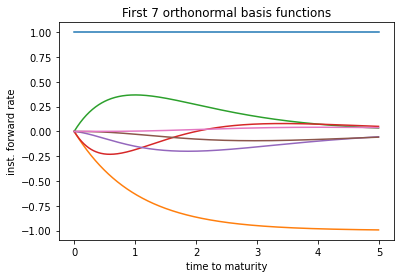

In [4]:
# Plot our basis functions
t = np.arange(0.0, 5.0, 0.01)
e1 =basis_fct(1,t)
e2 =basis_fct(2,t)
e3 =basis_fct(3,t)
e4 =basis_fct(4,t)
e5 =basis_fct(5,t)
e6 =basis_fct(6,t)
e7 =basis_fct(7,t)

fig=plt.figure()
ax=plt.axes()

ax.set(xlabel='time to maturity', ylabel='inst. forward rate',
       title='First 7 orthonormal basis functions')
ax.plot(t,e1)
ax.plot(t,e2)
ax.plot(t,e3)
ax.plot(t,e4)
ax.plot(t,e5)
ax.plot(t,e6)
ax.plot(t,e7)

plt.show()

In [5]:
def evalCurve0(x,tau):
    xSize=x.size
    Y0=np.zeros(tau.size)
    for k in range(0,xSize,1):
        Y0+=x[k]*basis_fct(k+1,tau)
    return np.exp(Y0)


# Simulate one Brownian motionfrom 0 to T. We discretize daily 
T=1/12#one month simulation time horizon 
L=30#Discretization of BM
s = np.arange(0.0, 1/12, 1/(12*L))
Tminuss=T-s
print(Tminuss)
deltaS=1/(12*L)
Ssize=s.size

def evalCurve(x,BMInc,tau):
    M=x.size
    TauSize=tau.size
    Y0=np.zeros(TauSize)
    drift=np.ones(TauSize)
    drift*=-(1/2)*T
    noise=np.ones(TauSize)
    noise*=mt.sqrt(T)*BMInc
    for k in range(0,M,1):
        Y0+=x[k]*basis_fct(k+1,tau+T)
        #tmp+=x[k]*np.power(t+T,k-1)*mt.exp(-(t+T))
    return np.exp(drift+noise+Y0)

[0.08333333 0.08055556 0.07777778 0.075      0.07222222 0.06944444
 0.06666667 0.06388889 0.06111111 0.05833333 0.05555556 0.05277778
 0.05       0.04722222 0.04444444 0.04166667 0.03888889 0.03611111
 0.03333333 0.03055556 0.02777778 0.025      0.02222222 0.01944444
 0.01666667 0.01388889 0.01111111 0.00833333 0.00555556 0.00277778]


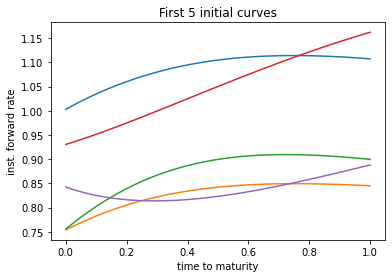

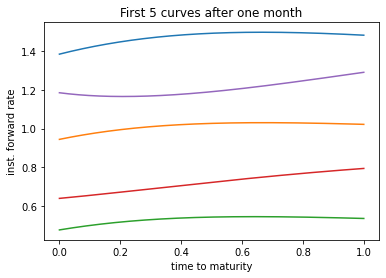

In [6]:
TrainingSize=10
StartingValues=np.random.uniform(low=-0.5, high=0.5, size=[TrainingSize,7])
Increments=np.random.normal(0,1,size=[TrainingSize,1])
discretizationx=365
gridx=np.linspace(0, 1, num=discretizationx)

curve00=np.zeros(discretizationx)
curve00=evalCurve0(StartingValues[0],gridx)
curve0T=evalCurve(StartingValues[0],Increments[0],gridx)

curve10=np.zeros(discretizationx)
curve10=evalCurve0(StartingValues[1],gridx)
curve1T=evalCurve(StartingValues[1],Increments[1],gridx)

curve20=np.zeros(discretizationx)
curve20=evalCurve0(StartingValues[2],gridx)
curve2T=evalCurve(StartingValues[2],Increments[2],gridx)

curve30=np.zeros(discretizationx)
curve30=evalCurve0(StartingValues[3],gridx)
curve3T=evalCurve(StartingValues[3],Increments[3],gridx)

curve40=np.zeros(discretizationx)
curve40=evalCurve0(StartingValues[4],gridx)
curve4T=evalCurve(StartingValues[4],Increments[4],gridx)

fig=plt.figure()
ax=plt.axes()

ax.set(xlabel='time to maturity', ylabel='inst. forward rate',
       title='First 5 initial curves')
ax.plot(gridx,curve00)
ax.plot(gridx,curve10)
ax.plot(gridx,curve20)
ax.plot(gridx,curve30)
ax.plot(gridx,curve40)

plt.show()


fig=plt.figure()
axT=plt.axes()

axT.set(xlabel='time to maturity', ylabel='inst. forward rate',
       title='First 5 curves after one month')
axT.plot(gridx,curve0T)
axT.plot(gridx,curve1T)
axT.plot(gridx,curve2T)
axT.plot(gridx,curve3T)
axT.plot(gridx,curve4T)

#ax.plot(t,e30)

plt.show()

Now calculate the outputs...

In [7]:
#Just for testing
#Callpayoff, one month delivery with delivery starting after one month, strike price K. 
#Just do a daily discretisation for integral for the moment.
Strike=1.0
taugrid=np.arange(0.0, 1/12, 1/(12*L))
Y=np.zeros(TrainingSize)
for sample in range(0,TrainingSize,1):
    tmpvec=evalCurve(StartingValues[sample],Increments[sample],taugrid)
    tmp=np.sum(tmpvec)*(12/365)
    tmp=max(tmp-Strike,0)
    Y[sample]=tmp

print(Y)
#np.save('outputsMultiVariateNoise', Y)

[0.38040389 0.         0.         0.         0.16203804 0.
 0.13921553 0.         1.008451   0.50456925]


In [8]:
import sys
print(sys.version_info)
!{sys.executable} -m pip install multiprocess

sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)


In [9]:
from numpy.random import SeedSequence, default_rng
ss = SeedSequence(12345)

# Spawn off 10 child SeedSequences to pass to child processes.
child_seeds = ss.spawn(32)
streams = [default_rng(s) for s in child_seeds]

In [10]:
def magic_function(f):
    Strike = 1.0
    TrainSizePerNode = 312500
    StartingValuesLocal= f[1].uniform(low=-0.5, high=0.5, size=[TrainSizePerNode,7])

    IncrementsBM = f[1].normal(0,1,size=[TrainSizePerNode,1])
    Y=np.zeros(TrainSizePerNode)
    
    for sample in range(0, TrainSizePerNode, 1):
        
        tmpvec=evalCurve(StartingValuesLocal[sample],IncrementsBM[sample],taugrid)
        tmp=np.sum(tmpvec)*(12/365)
        tmp=max(tmp-Strike,0)
        Y[sample]=tmp
    return StartingValuesLocal, Y


def process_frame(f):
    return f[0], magic_function(f)




In [11]:
from tqdm import tqdm

from multiprocess import Pool
import time
tic = time.perf_counter()
#from magic_functions import process_frame

frames_list = [[i,streams[i]] for i in range(0,len(streams),1)]

max_pool = 32

with Pool(max_pool) as p:
    pool_outputs = list(
        tqdm(
            p.imap(process_frame,
                   frames_list),
            total=len(frames_list)
        )
    )    

print(pool_outputs)
new_dict = dict(pool_outputs)
toc = time.perf_counter()
print(f"Calc time: {toc - tic:0.4f} seconds")



100%|██████████| 32/32 [00:57<00:00,  1.79s/it]

[(0, (array([[ 0.36999885,  0.06088184, -0.27843507, ...,  0.05552605,
         0.27597337,  0.46055534],
       [ 0.41627211, -0.32638021,  0.30962175, ...,  0.10310086,
        -0.32621497, -0.0346609 ],
       [ 0.45123417,  0.28628765, -0.34419823, ...,  0.17506217,
        -0.22866537,  0.30101809],
       ...,
       [ 0.21058761, -0.2022711 ,  0.32599155, ..., -0.32282033,
        -0.36100926,  0.22783091],
       [-0.11202374,  0.30842681,  0.23719087, ...,  0.28733955,
         0.49417572, -0.31103638],
       [ 0.38397397, -0.14599183, -0.46513065, ..., -0.40835324,
         0.33983648,  0.44107542]]), array([0.77322275, 0.13960061, 0.22053087, ..., 0.09392351, 0.32219139,
       0.31754711]))), (1, (array([[-0.12292459,  0.18954752,  0.24347235, ..., -0.012945  ,
         0.18943038, -0.31699783],
       [ 0.30189439, -0.39355406, -0.06432063, ...,  0.486978  ,
        -0.31504875, -0.27410072],
       [-0.24313982, -0.1069087 , -0.48672306, ..., -0.31561184,
         0.0676

In [12]:
TrainSizePerNode=312500
TotalTrainSize=TrainSizePerNode*len(streams)
startingValues=np.zeros((TotalTrainSize,7))
Yvalues=np.zeros(TotalTrainSize)
for x in range(0, len(streams), 1):
    startingValues[x*TrainSizePerNode:(x+1)*TrainSizePerNode]=pool_outputs[x][1][0]
    Yvalues[x*TrainSizePerNode:(x+1)*TrainSizePerNode]=pool_outputs[x][1][1]
#print(startingValues)
print(Yvalues[3])
print(Yvalues.ndim)
np.save('startingvaluesUniVariate', startingValues)
np.save('outputsUniVariate',Yvalues)

0.0
1


In [13]:
print(Yvalues)

[0.77322275 0.13960061 0.22053087 ... 0.37118548 0.44038337 0.84606551]
